In [38]:
import feedparser
import pandas as pd
from urllib.parse import quote
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import os

In [39]:
os.makedirs("data", exist_ok=True)
os.makedirs("images", exist_ok=True)

sns.set(style="whitegrid")

In [43]:
queries = [
    "India AI summit",
    "India artificial intelligence",
    "AI startups India",
    "AI investment India",
    "India generative AI"
]

articles = []


for query in queries:
    encoded_query = quote(query)
    url = f"https://news.google.com/rss/search?q={encoded_query}"

    feed = feedparser.parse(url)

    for entry in feed.entries:
        articles.append({
            "title": entry.title,
            "source": entry.source.title if "source" in entry else None,
            "published": entry.published if "published" in entry else None,
            "link": entry.link,
            "search_topic": query
        })

df = pd.DataFrame(articles)
df = df.drop_duplicates(subset="title")

df.to_csv("india_ai_news.csv", index=False)




In [44]:
df["published"] = pd.to_datetime(df["published"], errors="coerce")

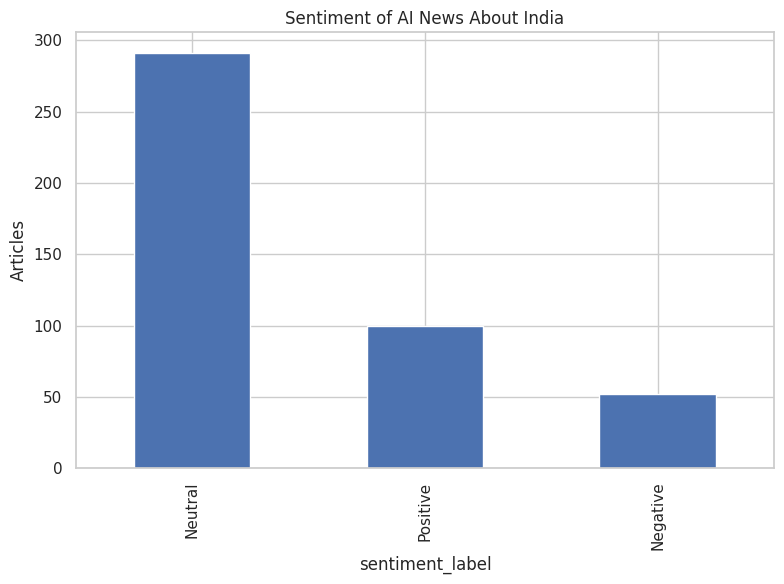

In [45]:
df["sentiment"] = df["title"].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)

df["sentiment_label"] = df["sentiment"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)

plt.figure(figsize=(8,6))
df["sentiment_label"].value_counts().plot(kind="bar")

plt.title("Sentiment of AI News About India")
plt.ylabel("Articles")

plt.tight_layout()
plt.savefig("images/sentiment_distribution.png")
plt.show()

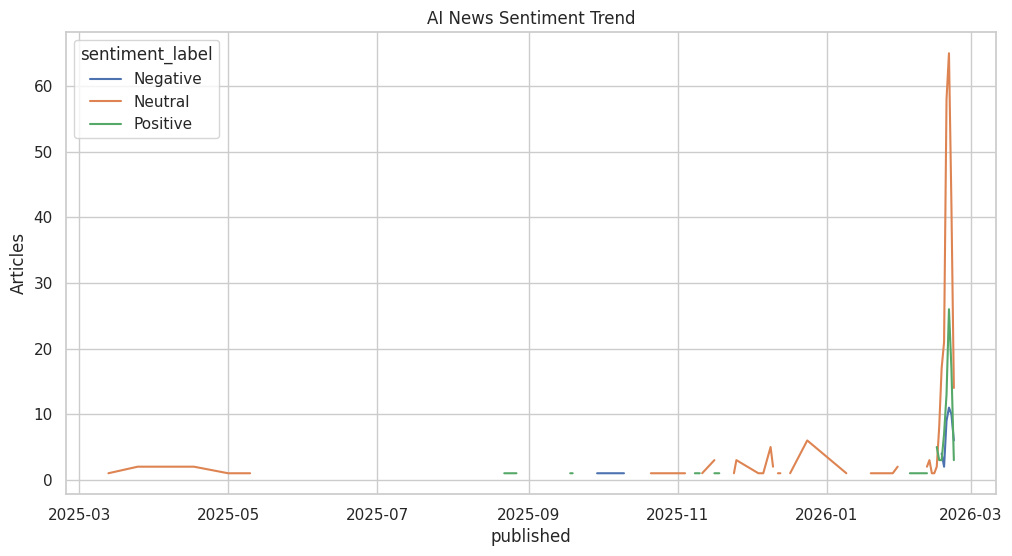

In [46]:
sentiment_trend = df.groupby(
    [df["published"].dt.date, "sentiment_label"]
).size().unstack()

sentiment_trend.plot(figsize=(12,6))

plt.title("AI News Sentiment Trend")
plt.ylabel("Articles")

plt.savefig("images/sentiment_trend.png")
plt.show()

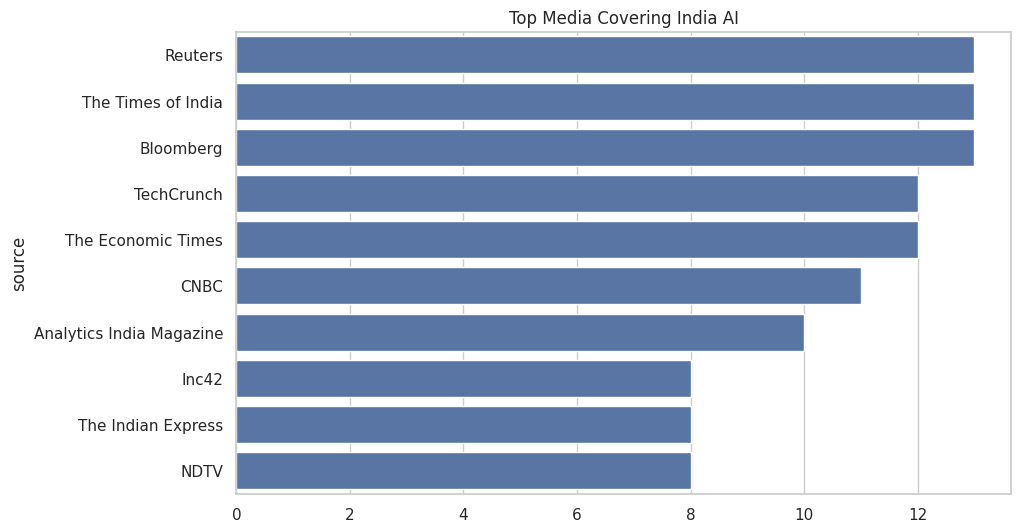

In [47]:
top_sources = df["source"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_sources.values, y=top_sources.index)

plt.title("Top Media Covering India AI")

plt.savefig("images/top_sources.png")
plt.show()

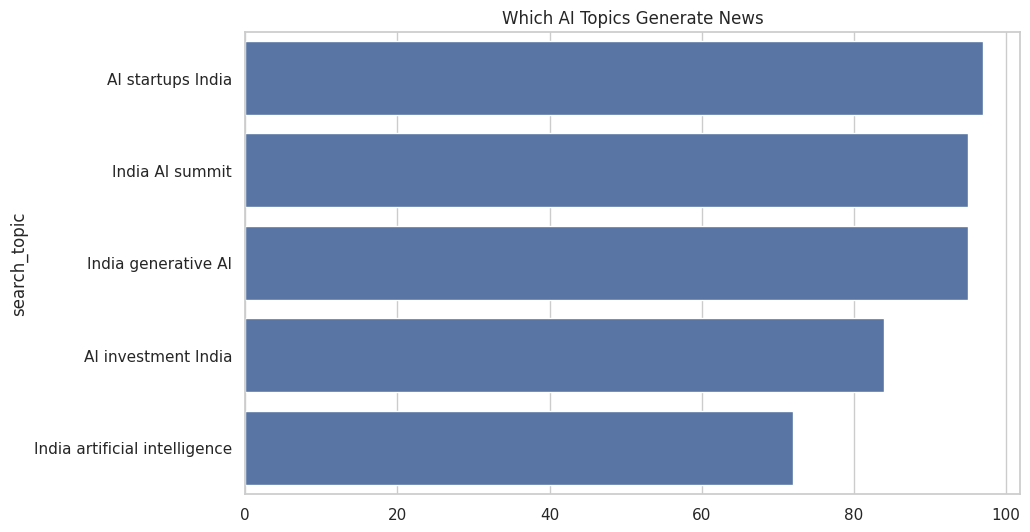

In [48]:
query_counts = df["search_topic"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=query_counts.values, y=query_counts.index)

plt.title("Which AI Topics Generate News")

plt.savefig("images/topic_distribution.png")
plt.show()

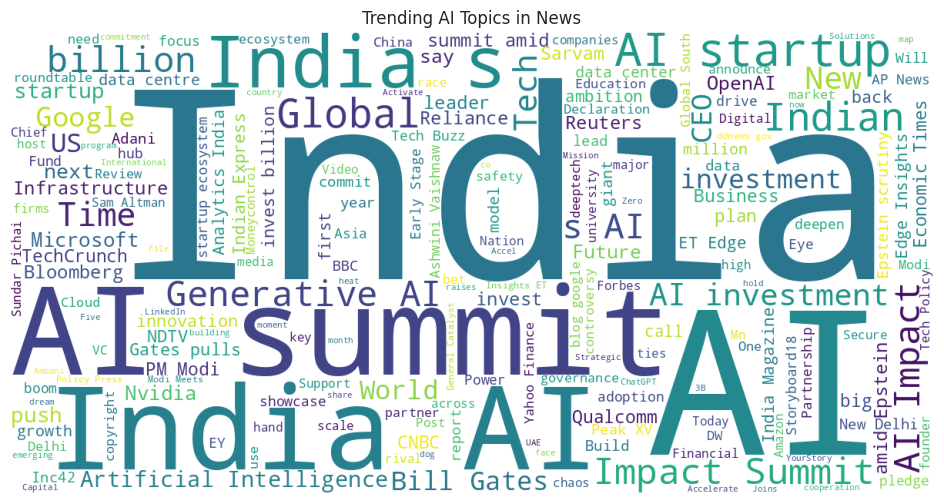

In [50]:
text = " ".join(df["title"].astype(str))

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white"
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")

plt.title("Trending AI Topics in News")

plt.savefig("images/ai_wordcloud.png")
plt.show()


In [51]:
companies = [
    "Google", "Microsoft", "Nvidia", "OpenAI",
    "Infosys", "TCS", "Reliance", "Meta", "Amazon"
]

company_counts = {}

for company in companies:
    count = df["title"].str.contains(company, case=False).sum()
    company_counts[company] = count

company_df = pd.DataFrame.from_dict(
    company_counts, orient="index", columns=["mentions"]
)

company_df = company_df.sort_values(
    by="mentions",
    ascending=False
)

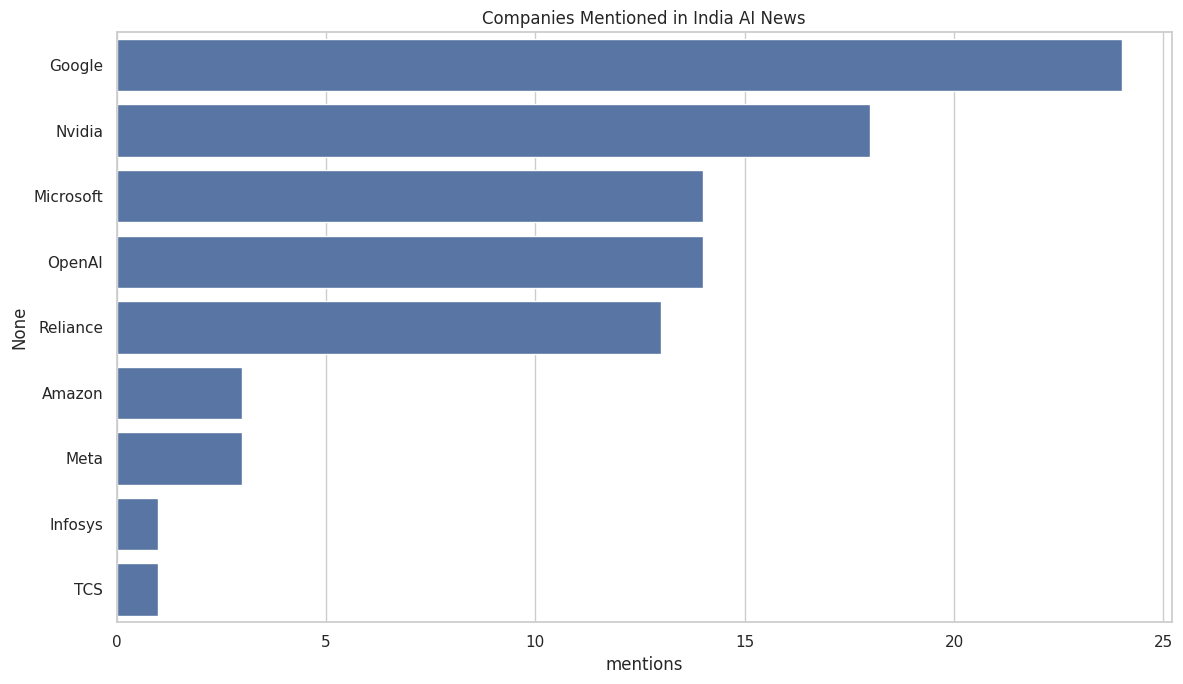

In [52]:
plt.figure(figsize=(12,7))

sns.barplot(
    x=company_df["mentions"],
    y=company_df.index
)

plt.title("Companies Mentioned in India AI News")

plt.tight_layout()
plt.savefig("images/company_mentions.png")
plt.show()

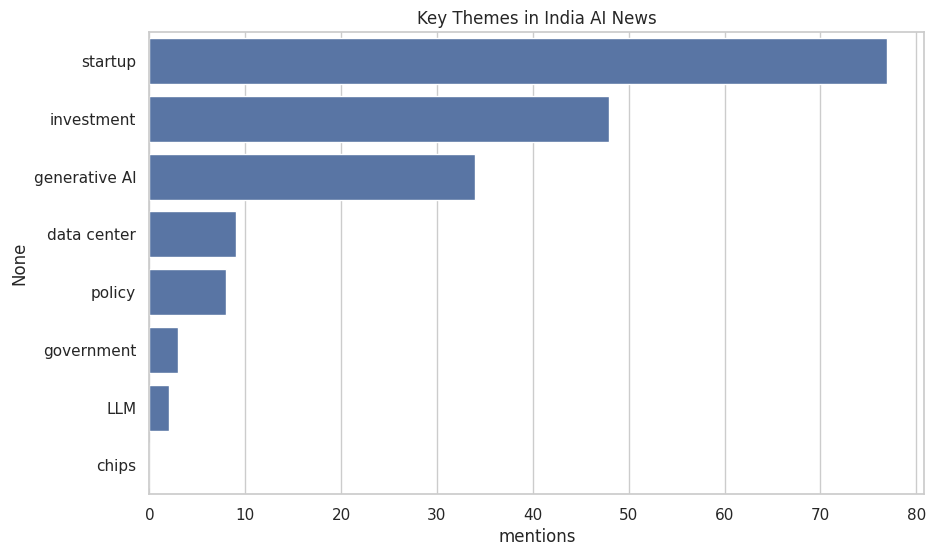

In [53]:
keywords = [
    "startup",
    "investment",
    "government",
    "policy",
    "chips",
    "data center",
    "generative AI",
    "LLM"
]

keyword_counts = {}

for keyword in keywords:
    keyword_counts[keyword] = df["title"].str.contains(
        keyword, case=False
    ).sum()

keyword_df = pd.DataFrame.from_dict(
    keyword_counts, orient="index", columns=["mentions"]
)

keyword_df = keyword_df.sort_values(
    by="mentions",
    ascending=False
)

plt.figure(figsize=(10,6))
sns.barplot(x=keyword_df["mentions"], y=keyword_df.index)

plt.title("Key Themes in India AI News")

plt.savefig("images/ai_themes.png")
plt.show()
